#### The Phillips Curve in America

### Python Programming and Data Setup

In [1]:
# import libraries...

import pandas as pd
import numpy as np
import math
import time

import copy
import itertools
from itertools import chain, combinations
from linearmodels.iv import IV2SLS
import matplotlib.pyplot as plt
import scipy.stats as scipystats
import seaborn as sns
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
from statsmodels.iolib.summary2 import summary_col
import statsmodels.stats as stats 
import statsmodels.stats.stattools as stools

%matplotlib inline

plt.style.use('seaborn')

/Users/delong/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/delong/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
phillips_curve_df = pd.read_csv(
    'https://delong.typepad.com/files/2019-10-23-phillips-curve-annual-1.csv'
    )

phillips_curve_df['year_index'] = phillips_curve_df['year']
phillips_curve_df.set_index('year_index', inplace=True)

phillips_curve_dict = {
                        'df': phillips_curve_df, 
                        'csv_url': 'https://delong.typepad.com/files/2019-10-23-phillips-curve-annual-1.csv', 
                        'fred_url': 'https://research.stlouisfed.org/useraccount/datalists/230761',
                        'Title1': 'Consumer Price Index: All Items Less Food and Energy: All Urban Consumers', 
                        'Source': 'U.S. Bureau of Labor Statistics: Consumer Price Index', 
                        'Note': 'The "Consumer Price Index for All Urban Consumers: All Items Less Food \
                            & Energy" is an aggregate of prices paid by urban consumers for a typical \
                            basket of goods, excluding food and energy. This measurement, known as "Core \
                            CPI," is widely used by economists because food and energy have very volatile \
                            prices. The Bureau of Labor Statistics defines and measures the official CPI, \
                            and more information can be found in the FAQ: \
                            (https://www.bls.gov/cpi/questions-and-answers.htm) or in this article: \
                            (https://www.bls.gov/opub/hom/pdf/cpihom.pdf)', 
                        'Seasonally Adjusted': True, 
                        'Title2': 'Unemployment Rate',
                        'Source': 'U.S. Bureau of Labor Statistics: Current Population Survey', 
                        'Note2': 'The unemployment rate represents the number of unemployed as a percentage \
                            of the labor force. Labor force data are restricted to people 16 years of age and \
                            older, who currently reside in 1 of the 50 states or the District of Columbia, \
                            who do not reside in institutions (e.g., penal and mental facilities, homes for \
                            the aged), and who are not on active duty in the Armed Forces. This rate is also\
                            defined as the U-3 measure of labor underutilization.'
                        'Seasonally Adjusted': True, 
                        }

# phillips_curve_df.head()

&nbsp;

# The Phillips Curve in America

In the United States betwee 1957 and 1988—the first half of the last 60 years—the slope of the simplest-possible adaptive-expectations Phillips Curve was -0.54: each one-percentage point fall in unemployment below the estimated natural rate boosted inflation in the subsequent year by 0.54%-points above its contemporary value. Since 1988—in the second half of the past 60 years—the slope of this simplest-possible Phillips curve has been effectively zero: the estimated regression coefficient has been not -0.54 but only -0.03.

The most important observations driving the estimated negative slope of the Phillips Curve in the first half of the past sixty years were 1966, 1973, and 1974—inflation jumping up in times of relatively-low unemployment—and 1975, 1981, and 1982—inflation falling in times of relatively-high unemployment. The most important observations driving the estimated zero slope of the Phillips Curve in the second half of the past sixty years have been 2009-2014: the failure of inflation to fall as the economy took its Gtreat-Recession excursion to a high-unemployment labor market with enormous slack.

I remember September 2014: That month the U.S. unemployment rate dropped below 6%, and I was assured by very many that that meant that the Phillps Curve predicted that inflation would soon be on the rise, and that it was time for the Federal Reserve to begin to—rapidly—normalize monetary policy—to begin shrinking the monetary base, and raising interest rates back into a "normal" range. Today unemployment is 2.5%-points lower than what I was then assured was the "natural" rate of unemployment. According to the rule-of-thumb as they stood back when I was an assistant professor in 1990, such a low unemployment rate should lead annual inflation to climb by 1.3%-points every year: if this year inflation were to be 2.0%, next year's would be 3.3%, and—if unemployment stayed this low—the year after that's would be 4.6%, and the year after that 5.9%.

But that is not going to happen. Inflation will stay about 2% for the next several years. The old rule-of-thumb no longer applies. And that should drive our monetary policy choices.

Now the conventional wisdom among economists as it stood back in 1990 was correct, for then. The fact is that in the United States between 1957 and 1988—the first half of the last 60 years—the slope of the simplest-possible adaptive-expectations Phillips Curve was -0.54. But that was then. This is now. Since 1988—for the second half of the past 60 years—the slope of this simplest-possible Phillips curve has been not -0.54 but only -0.03. Even as unemployment has gotten far below what economists presumed was the natural rate of unemployment recently, inflation in the United States has not accelerated. And even when unemployment got far above what economists presumed was the natural rate of unemployment over 2009-2014, inflation did not fall and deflation did not set in. The estimated regression-analysis coefficient of -0.03 is telling us that as unemployment has fluctuated since the late 1980s, inflation has not. By contrast, in the U.S. from the late 1950s to the late 1980s, when unemployment fluctuated inflation responded.

Nevertheless, there are many people who believe that an acceleration of inflation is a significant risk that monetary policymakers need to focus on—that the more important danger is of an outbreak of higher inflation rather than the possibility of recession. The very sharp Peter Hooper, Frederic S. Mishkin, and Amir Sufi, for example <https://delong.typepad.com/files/phillips-hibernating-1.pdf>, argue that the American Phillips Curve is "just hibernating", and that the estimates that show the past generation's Phillips Curve as essentially flat are untrustworthy because of "endogeneity of monetary policy and the lack of variation of the unemployment gap". But this I do not understand: the computer tells us that the 1988-2018 estimates are three times as precise as the 1957-1987 ones, and standard specifications of the Phillips Curve slope look at too short a window for any monetary policy reaction to be substantial.

Yes, an outbreak of inflation could be a threat. Yes, if we had analogues of (a) two presidents, Johnson and Nixon, desperate for a persistent high-pressure economy; (b) a Federal Reserve chair like Arthur Burns eager to accommodate presidential demands; (c) the rise of a global monopoly in the economy's key input able to deliver mammoth supply shocks; and (d) a decade of bad luck; then we might see a return to inflation as it was in the (pre-Iran crisis) early and mid-1970s. But is that really the tail risk we should be focused on? 

It is long past time to take seriously what the data are telling us: until the structure of the economy and economic policy changes again, there is little risk that over the next five years we will find ourselves facing a painful excessive-inflation problem. Monetary policymakers should be focused on other problems, and other risks. 

&nbsp;

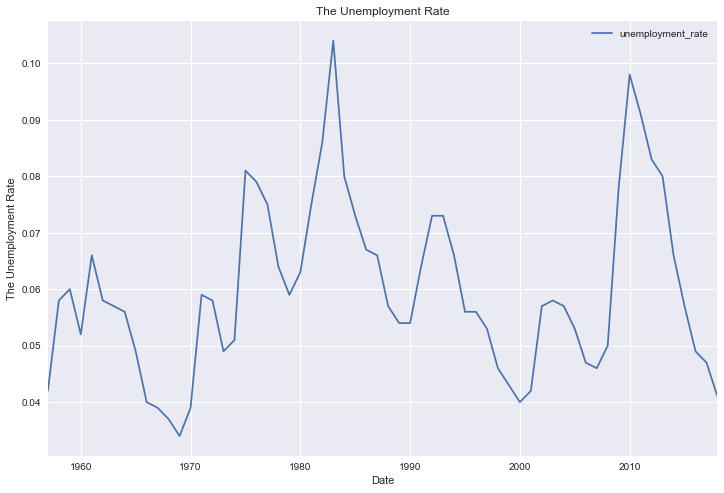

In [34]:
phillips_curve_df.plot(x='year', 
    y='unemployment_rate', kind='line')

plt.title("The Unemployment Rate")
plt.xlabel("Date")
plt.ylabel("The Unemployment Rate")

plt.show()

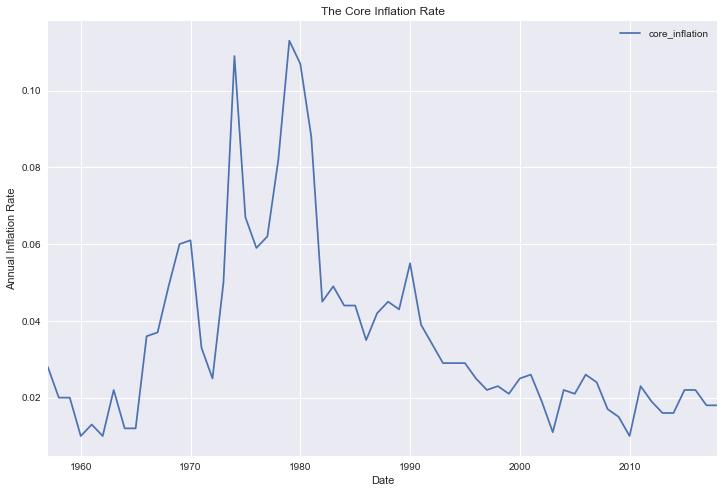

In [33]:
phillips_curve_df.plot(x='year', 
    y='core_inflation', kind='line')

plt.title("The Core Inflation Rate")
plt.xlabel("Year")
plt.ylabel("Annual Inflation Rate")

plt.show()

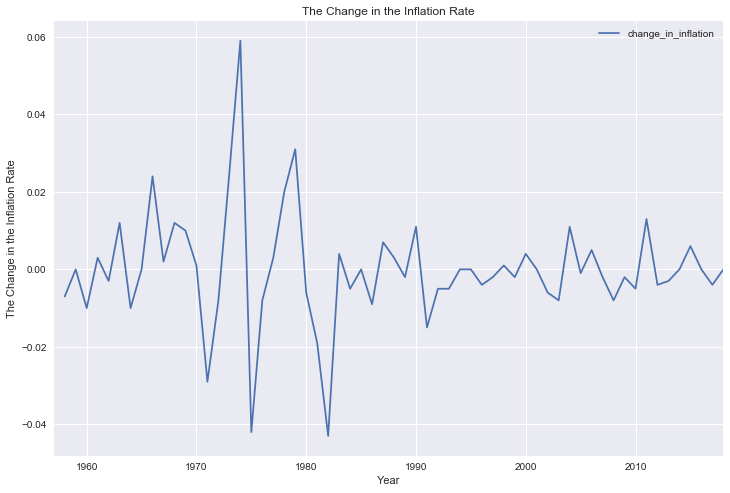

In [35]:
phillips_curve_df.plot(x='year', 
    y='change_in_inflation', kind='line')

plt.title("The Change in the Inflation Rate")
plt.xlabel("Year")
plt.ylabel("The Change in the Inflation Rate")

plt.show()

/Users/delong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


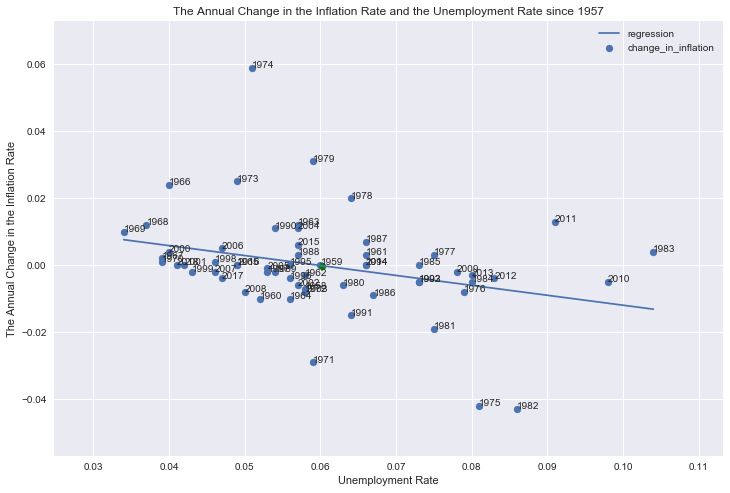

In [32]:
phillips_curve2_df = phillips_curve_df[1:]

phillips_curve2_df.sort_values(by=['unemployment_rate'], inplace=True)

%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 8)

x1 = phillips_curve2_df['unemployment_rate']
y1 = phillips_curve2_df['change_in_inflation']

lm = sm.OLS(y1, sm.add_constant(x1)).fit()

fig, ax = plt.subplots()

plt.scatter(x1, y1)
plt.scatter(np.mean(x1), np.mean(y1), color = "green")
plt.plot(np.sort(x1), lm.predict()[np.argsort(x1)], label = "regression")
plt.title("The Annual Change in the Inflation Rate and the Unemployment Rate since 1957")
plt.xlabel("Unemployment Rate")
plt.ylabel("The Annual Change in the Inflation Rate")
plt.legend()

for i, year in enumerate(phillips_curve2_df['year']):
    ax.annotate(year, (x1.iloc[i], y1.iloc[i]))

In [8]:
phillips_curve_df['const'] = 1

reg1 = sm.OLS(endog=phillips_curve_df['change_in_inflation'], 
    exog=phillips_curve_df[['const', 'unemployment_rate']], 
    missing='drop')
results1 = reg1.fit()
print(results1.summary())

                             OLS Regression Results                            
Dep. Variable:     change_in_inflation   R-squared:                       0.096
Model:                             OLS   Adj. R-squared:                  0.081
Method:                  Least Squares   F-statistic:                     6.301
Date:                 Wed, 23 Oct 2019   Prob (F-statistic):             0.0148
Time:                         10:15:52   Log-Likelihood:                 174.61
No. Observations:                   61   AIC:                            -345.2
Df Residuals:                       59   BIC:                            -341.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0177

In [26]:
reg1a = sm.OLS(endog=phillips_curve_df[:31]['change_in_inflation'], 
    exog=phillips_curve_df[:31][['const', 'unemployment_rate']], 
    missing='drop')
results1a = reg1a.fit()
print(results1a.summary())

                             OLS Regression Results                            
Dep. Variable:     change_in_inflation   R-squared:                       0.185
Model:                             OLS   Adj. R-squared:                  0.156
Method:                  Least Squares   F-statistic:                     6.343
Date:                 Wed, 23 Oct 2019   Prob (F-statistic):             0.0178
Time:                         10:52:47   Log-Likelihood:                 78.037
No. Observations:                   30   AIC:                            -152.1
Df Residuals:                       28   BIC:                            -149.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0336

In [27]:
phillips_curve_df['const'] = 1

reg1b = sm.OLS(endog=phillips_curve_df[31:]['change_in_inflation'], 
    exog=phillips_curve_df[31:][['const', 'unemployment_rate']], 
    missing='drop')
results1b = reg1b.fit()
print(results1b.summary())

                             OLS Regression Results                            
Dep. Variable:     change_in_inflation   R-squared:                       0.005
Model:                             OLS   Adj. R-squared:                 -0.029
Method:                  Least Squares   F-statistic:                    0.1593
Date:                 Wed, 23 Oct 2019   Prob (F-statistic):              0.693
Time:                         10:53:49   Log-Likelihood:                 116.07
No. Observations:                   31   AIC:                            -228.1
Df Residuals:                       29   BIC:                            -225.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0009

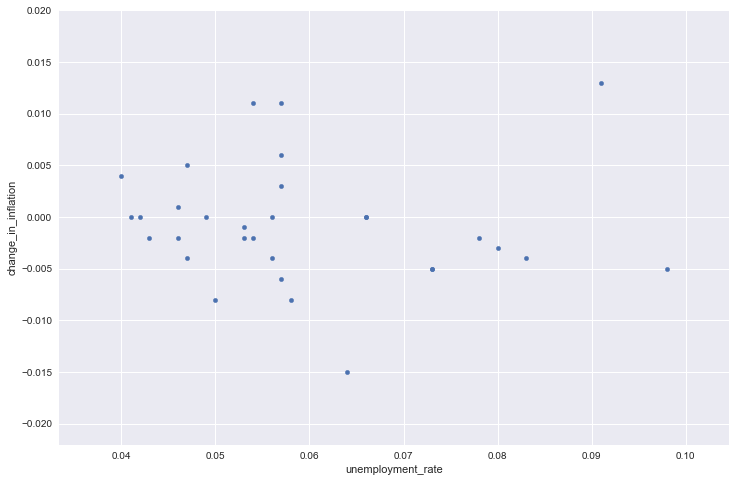

In [30]:
phillips_curve_df[31:].plot(x='unemployment_rate', 
    y='change_in_inflation', kind='scatter')

plt.show()

In [9]:
phillips_curve_df['lag_inflation'] = phillips_curve_df.shift(+1)['core_inflation']

reg2 = sm.OLS(endog=phillips_curve_df['core_inflation'], 
    exog=phillips_curve_df[['const', 'unemployment_rate', 'lag_inflation']], 
    missing='drop')
results2 = reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:         core_inflation   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     65.84
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           1.20e-15
Time:                        10:15:54   Log-Likelihood:                 176.29
No. Observations:                  61   AIC:                            -346.6
Df Residuals:                      58   BIC:                            -340.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0194      0.00

In [10]:
reg3 = sm.OLS(endog=phillips_curve_df[:31]['core_inflation'], 
    exog=phillips_curve_df[:31][['const', 'unemployment_rate', 'lag_inflation']], 
    missing='drop')
results3 = reg3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:         core_inflation   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     23.69
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           1.15e-06
Time:                        10:15:54   Log-Likelihood:                 78.760
No. Observations:                  30   AIC:                            -151.5
Df Residuals:                      27   BIC:                            -147.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0337      0.01

In [11]:
reg4 = sm.OLS(endog=phillips_curve_df[:41]['core_inflation'], 
    exog=phillips_curve_df[:41][['const', 'unemployment_rate', 'lag_inflation']], 
    missing='drop')
results4 = reg4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:         core_inflation   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     33.96
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           4.23e-09
Time:                        10:15:55   Log-Likelihood:                 109.77
No. Observations:                  40   AIC:                            -213.5
Df Residuals:                      37   BIC:                            -208.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0323      0.01

In [12]:
reg5 = sm.OLS(endog=phillips_curve_df[:51]['core_inflation'], 
    exog=phillips_curve_df[:51][['const', 'unemployment_rate', 'lag_inflation']], 
    missing='drop')
results5 = reg5.fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:         core_inflation   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     48.38
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           3.88e-12
Time:                        10:15:55   Log-Likelihood:                 141.15
No. Observations:                  50   AIC:                            -276.3
Df Residuals:                      47   BIC:                            -270.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0257      0.00

In [13]:
reg6 = sm.OLS(endog=phillips_curve_df[:31]['change_in_inflation'], 
    exog=phillips_curve_df[:31][['const', 'unemployment_rate']], 
    missing='drop')
results6 = reg6.fit()
print(results6.summary())

                             OLS Regression Results                            
Dep. Variable:     change_in_inflation   R-squared:                       0.185
Model:                             OLS   Adj. R-squared:                  0.156
Method:                  Least Squares   F-statistic:                     6.343
Date:                 Wed, 23 Oct 2019   Prob (F-statistic):             0.0178
Time:                         10:15:56   Log-Likelihood:                 78.037
No. Observations:                   30   AIC:                            -152.1
Df Residuals:                       28   BIC:                            -149.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0336

In [14]:
reg7 = sm.OLS(endog=phillips_curve_df[:41]['change_in_inflation'], 
    exog=phillips_curve_df[:41][['const', 'unemployment_rate']], 
    missing='drop')
results7 = reg7.fit()
print(results7.summary())

                             OLS Regression Results                            
Dep. Variable:     change_in_inflation   R-squared:                       0.183
Model:                             OLS   Adj. R-squared:                  0.161
Method:                  Least Squares   F-statistic:                     8.507
Date:                 Wed, 23 Oct 2019   Prob (F-statistic):            0.00591
Time:                         10:15:56   Log-Likelihood:                 109.04
No. Observations:                   40   AIC:                            -214.1
Df Residuals:                       38   BIC:                            -210.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0322

In [15]:
reg8 = sm.OLS(endog=phillips_curve_df[:51]['change_in_inflation'], 
    exog=phillips_curve_df[:51][['const', 'unemployment_rate']], 
    missing='drop')
results8 = reg8.fit()
print(results8.summary())

                             OLS Regression Results                            
Dep. Variable:     change_in_inflation   R-squared:                       0.156
Model:                             OLS   Adj. R-squared:                  0.139
Method:                  Least Squares   F-statistic:                     8.898
Date:                 Wed, 23 Oct 2019   Prob (F-statistic):            0.00448
Time:                         10:15:57   Log-Likelihood:                 140.53
No. Observations:                   50   AIC:                            -277.1
Df Residuals:                       48   BIC:                            -273.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0265

----

----

----

The rsquared values is 0.09648724931046992


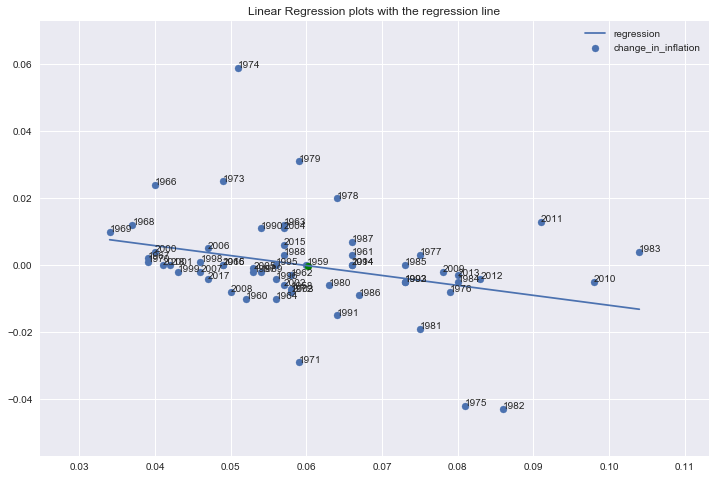

In [16]:
plt.rcParams['figure.figsize'] = (12, 8)

x1 = phillips_curve2_df['unemployment_rate']
y1 = phillips_curve2_df['change_in_inflation']

lm = sm.OLS(y1, sm.add_constant(x1)).fit()
print("The rsquared values is " + str(lm.rsquared))

fig, ax = plt.subplots()

plt.scatter(x1, y1)
plt.scatter(np.mean(x1), np.mean(y1), color = "green")
plt.plot(np.sort(x1), lm.predict()[np.argsort(x1)], label = "regression")
plt.title("Linear Regression plots with the regression line")
plt.legend()

for i, year in enumerate(phillips_curve2_df['year']):
    ax.annotate(year, (x1.iloc[i], y1.iloc[i]))

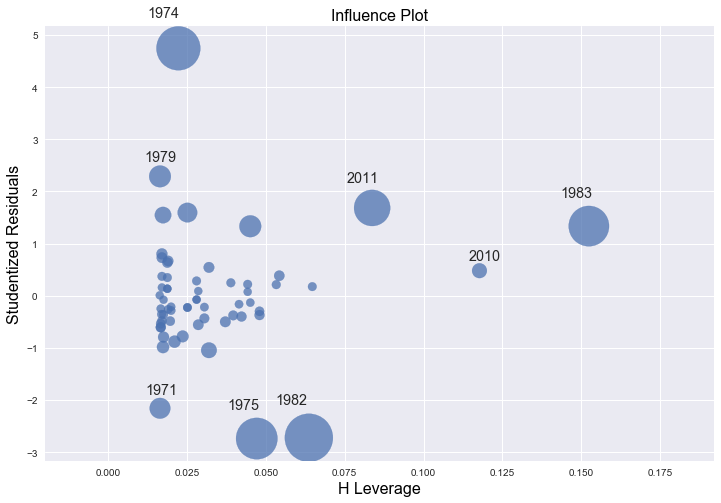

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm, alpha  = 0.05, ax = ax, criterion="cooks")

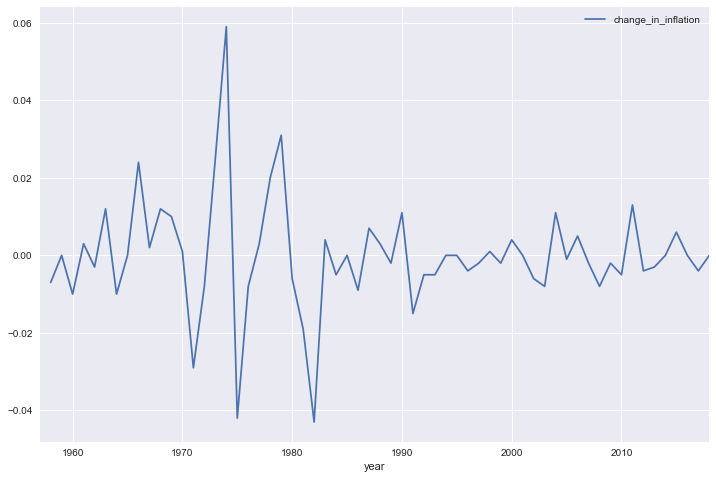

In [18]:
phillips_curve_df.plot(x='year', 
    y='change_in_inflation', kind='line')

plt.show()

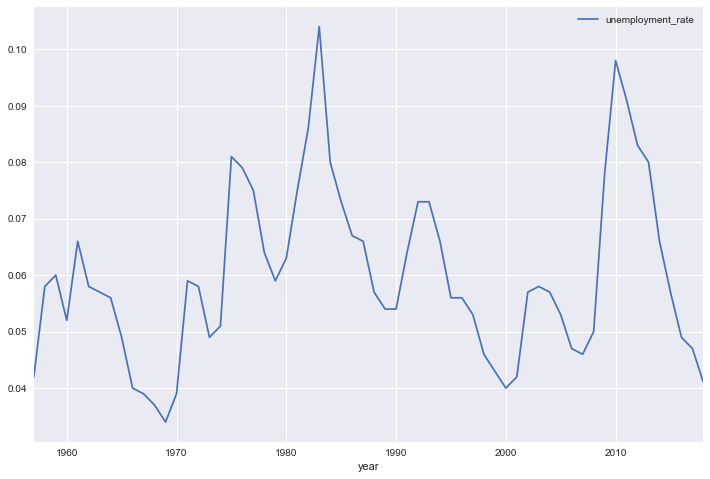

In [19]:
phillips_curve_df.plot(x='year', 
    y='unemployment_rate', kind='line')

plt.show()

In [23]:
phillips_curve2_df['lag_ch_inflation'] = phillips_curve2_df.shift(+1)['change_in_inflation']
phillips_curve2_df['lead_ch_inflation'] = phillips_curve2_df.shift(-1)['change_in_inflation']
phillips_curve2_df['const'] = 1

reg9 = sm.OLS(endog=phillips_curve2_df['change_in_inflation'], 
    exog=phillips_curve2_df[['const', 'unemployment_rate']], 
    missing='drop')
results9 = reg9.fit()
print(results9.summary())

                             OLS Regression Results                            
Dep. Variable:     change_in_inflation   R-squared:                       0.096
Model:                             OLS   Adj. R-squared:                  0.081
Method:                  Least Squares   F-statistic:                     6.301
Date:                 Wed, 23 Oct 2019   Prob (F-statistic):             0.0148
Time:                         10:21:33   Log-Likelihood:                 174.61
No. Observations:                   61   AIC:                            -345.2
Df Residuals:                       59   BIC:                            -341.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0177

/Users/delong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/delong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/delong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [24]:
reg10 = sm.OLS(endog=phillips_curve2_df['lag_ch_inflation'], 
    exog=phillips_curve2_df[['const', 'unemployment_rate']], 
    missing='drop')
results10 = reg10.fit()
print(results10.summary())

                            OLS Regression Results                            
Dep. Variable:       lag_ch_inflation   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     8.094
Date:                Wed, 23 Oct 2019   Prob (F-statistic):            0.00613
Time:                        10:21:44   Log-Likelihood:                 172.17
No. Observations:                  60   AIC:                            -340.3
Df Residuals:                      58   BIC:                            -336.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0205      0.00

In [25]:
reg11 = sm.OLS(endog=phillips_curve2_df['lead_ch_inflation'], 
    exog=phillips_curve2_df[['const', 'unemployment_rate']], 
    missing='drop')
results11 = reg11.fit()
print(results11.summary())

                            OLS Regression Results                            
Dep. Variable:      lead_ch_inflation   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     6.225
Date:                Wed, 23 Oct 2019   Prob (F-statistic):             0.0155
Time:                        10:22:03   Log-Likelihood:                 171.51
No. Observations:                  60   AIC:                            -339.0
Df Residuals:                      58   BIC:                            -334.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0186      0.00

<https://songhuiming.github.io/pages/2016/11/27/linear-regression-in-python-outliers-leverage-detect/>

----

----

And how is it, exactly, that "the difference between national and city/state results in recent decades can be explained by the success that monetary policy has had in quelling inflation and anchoring inflation expectations since the 1980s"? Neither of those two should affect the estimated coefficient. Much more likely is simply that—at the national level _and_ at the city/state level—the Phillips Curve becomes flat when inflation becomes low.

the evidence for "significant nonlinearity" in the Phillips Curve is that the curve flattens when _inflation_ is low, not that it steepens when _labor slack_ is low. There is simply no "strong evidence" of significant steepening with low labor slack. Yes, you can find specifications with a t-statistic of 2 in which this is the case, but you have to work hard to find such specifications, and your results are fragile. 

The most important observations driving the estimated zero slope of the Phillips Curve in the second half of the past sixty years have been 2009-2014: the failure of inflation to fall as the economy took its Great-Recession excursion to a high-unemployment labor market with enormous slack.